# 의사결정나무와 랜덤포레스트( 예측 / 분류 모델 )
## 13.3 의사결정나무와 랜덤포레스트( 예측 / 분류 모델 )

> 뒤집어 놓은 나무와 같은 모양. 가지가 나눠지는 부분이 독립변수의 조건, 마지막 잎사귀들은 종속변수를 나타냄

### 13.3.1 분류나무와 회귀나무
- 의사결정나무는 명목형 종속변수를 분류할 수 있는 분류나무와 연속형 종속변수를 예측할 수 있는 회귀나무로 나뉜다.

#### 분류나무
- 분류나무는 기본적으로 데이터를 얼마나 잘 분류했는지 알 수 있는 척도인 불순도를 낮추고 순도를 높이는 방향으로 분류기준을 찾아낸다. 즉 한 노드내에서는 범주의 동질성이 높고, 노드 간에는 이질성이 최대한 높도록 만들어주는 것이다. 

- 데이터의 불순도를 나타내는 대표적인 기준은 지니계수와 엔트로
- 분류를 통해 지니 계수나 엔트로피가 증가 혹은 감소한 양을 정보 획득량이라고 부른다. 
<20명에 대한 지니계수>
![Alt text](image-2.png)

<45세 연령기준으로 첫번째 분류>
![Alt text](image-3.png)

> 20명에 대한 지니계수에서 집단에 따른 지니계수 빼주면 된다. 
> 하지만 집단이 많을수록 지니계수가 너무 커지게 되므로 가중치를 부여해준다.
![Alt text](image-4.png)


- 엔트로피는 지니 계수와 비슷하지만 이진 로그를 취함으로써 정규화 과정을 거치게 되고, 값의 범위는 0~1을 갖게된다. 

- 엔트로피 공식

![Alt text](image-5.png)

![Alt text](image-6.png)
- 엔트로피의 정보 획득량도 지니계수와 마찬가지로 데이터 비율의 가중치를 주어 구할 수 있다. 

- 분류나무는 각 독립변수의 수치마다 지니 계수나 엔트로피 값을 구해서 최적의 정보 획득량을 얻을 수 있는 기준으로 분류를 해 나가는 것
- 1회 자식노드를 만들기 위해서 변수가 k개 , 관측치가 n개라고 했을 때 k(n-1)번 계산하고, 정보 획득량이 없을 때까지 가지를 뻗어나감. 

- 의자결정 나무의 종류

![Alt text](image-7.png)

#### 회귀나무

- 회구나무는 종속변수가 연속형 변수이기 떄문에 잔차 제곱합 등의 분류 기준을 사용한다.
- 회귀나무는 종속변수의 비선형성에 영향을 받지 않기 떄문에 일반 선형회귀분석에 비해 모델활용이 까다롭지않다.
> 회귀나무에서 각 잎 노드에서 종속변수의 예측은 해당 노드 내의 데이터 포인트의 평균값으로 계산된다. 이로써 각 잎 노드마다 다른수준의 종속변수 값을 예측할 수 있으며 이는 비선형성을 잡아낼수 있는 특징임. 즉 각각의 잎 노드에서 종속변수의 다른 수준을 예측하기 때문에 선형적이라고 말할 수 없음.

![Alt text](image-8.png)

- 회귀나무는 끝 노드에 속한 데이터 값의 평균을 구해 회귀 예측값을 계산한다. --> 비선형적임.

- 회귀나무는 그 밖에 F값이나 분산의 감소량을 분류 기준으로 사용한다.
- F값이 크다는것 = 노드 간의 이질성이 높다는 것을 의미함. 
- 분산의 감소량의 경우, 한 노드에 속한 관측치 값들의 분산이 작아진다는 것은 동질성이 높다는 것을 의미한다. 

### 13.3.2 의사결정나무 모델의 장단점
#### 장점
- 의사결정나무 모델은 비선형 모델이기 때문에 회귀분석과 같이 데이터의 선형성, 정규성, 등분산성 등이 필요하지 않다. 

#### 단점
- 의사결정나무와 일반 회귀 모델의 경우 명목형 변수는 예측 데이터에 있는 정보가 학습데이터에 없으면 예측이 불가능
- 의사결정나무는 학습데이터에 있는 연속형 변수의 값만큼만 예측데이터에 적용되기 떄문에, 예측할 수 있는 종속변수의 최소 최댓값은 학습 데이터의 범위에 한정된다.

> 따라서 학습데이터와 예측데이터의 연속형 변수값 편차가 큰경우에는 예측력이 떨어질 수 있음.

- 학습 데이터에 과적합 될 확률이 높다. 

### 13.3.3 의사결정나무 모델의 과적합 방지를 위한 방법


- 과적합을 방지하기 위해 가지치기, 정보획득량 임곗값 설정, 한 노드에 들어가는 최소 데이터 수 제한하기, 노드의 최대 깊이 제한하기 등이 있다. 

#### 가지치기
- 가지치기 : 모델의 분기 가지들을 적절히 쳐내 과도하게 세밀하게 분기된 부분들을 없애준다. 이는 버리는것이 아니라, 분기를 합치는 개념.

- 가지치기의 기준 : 분기 가지가 많아질수록 학습데이터의 오분류율은 낮아지게 되고, 특정수준 이상이 되면 검증 데이터의 오분류율은 높아지는 원리는 이용함.

![Alt text](image-9.png)

> 학습데이터로 만들어진 나무 모델응ㄹ 검증데이터에 반영하여, 오분류율을 확인한다. 끝단 가지들을 조금씩 쳐내가면서 검증데이터의 오분류율이 최소가 되는 시점까지 가지치기를 실시. --> 학습데이터의 모델정확도는 다소 떨어지더라도, 과적합을 방지하여 모델을 일반화할 수 있다.

#### 정보 획득량 임곗값 설정
- 분기를 했을 때 정보 획득량이 너무 적으면 분기를 멈추도록 설정하는것이다.
- 한 노드에 들어가는 최소 데이터 수를 제한하는 방법과
- 임계값은 노드를 분할하는 데 필요한 정보 획득량의 최소 기준을 정의 정보 획득량이 임곗값보다 낮은 분할은 수행되지 않고 노드의 분할이 중단

#### 노드의 최대 깊이 제한
- 노드의 최대깊이를 제한하는 방법 역시 가지가 너무 세세하게 분리되는것을 방지해 주기 떄문에 일반화된 의사결정나무 모델을 만들 떄 많이 쓰인다.
- 노드의 최대 깊이를 제한하면 모델의 복잡성을 줄이고 과적합을 방지할 수 잇다. -> 특정 깊이 제한을 설정하면 트리가 특정 깊이에 도달할 때, 더이상 분할하지 않고 종료
- 너무 작게 설정하면 과소적합일어남.

420


 







### 13.3.4 랜덤포레스트

학습 성능의 변동이 크다는 고질적인 문제를 보완하기 위해 나온 모델이 랜덤 포레스트임. 

나무를 여러 개 만들어서 학습을 하는것 인데, 나무 여러 개를 만들어 학습을 하게 되면 다양한 상황을 고려하여 학습하기 때문ㅔ 과적합을 방지할 수 잇따.

![Alt text](image-10.png)

- 부트스트랩 
: 부트스트랩은 하나의 데이터 셋을 중복을 허용하여 무작위로 여러 번 추출하는 것이다.

: 부트스트랩은 신뢰구간에 대한 통계적 추정의 정확도를 높이는 데 사용하는 유용한 방법.

: 랜덤 포레스트에서 무작위로 선택할 독립변수의 수는 일반적으로 전체 독립변수 개수의 제곱근으로 한다. 

![Alt text](image-11.png)

- 배깅 
: 여러 개의 의사결정 나무를 하나의 모델로 결합해 주는 것

: 분류 모델의 경우 투표 방식으로 집계하여 연속형 값의 예측모델인 경우 평균으로 집계한다.

: 

### 실습

In [1]:
## 필요한 패키지 임포트

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
import pydotplus
from sklearn.tree import export_graphviz
from sklearn.metrics import accuracy_score
from IPython.core.display import Image
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV





In [2]:
df = pd.read_csv('glass.csv')
df.head()
###각 유리의 종류를 의미하는 type이랑 원재료 함량에 대한 정보


,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      214 non-null    float64
 1   Na      214 non-null    float64
 2   Mg      214 non-null    float64
 3   Al      214 non-null    float64
 4   Si      214 non-null    float64
 5   K       214 non-null    float64
 6   Ca      214 non-null    float64
 7   Ba      214 non-null    float64
 8   Fe      214 non-null    float64
 9   Type    214 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 16.8 KB


In [4]:
df['Type'].unique()

array([1, 2, 3, 5, 6, 7], dtype=int64)

In [5]:
### Type 칼럼 문자형 변환
df['Type_str'] = df['Type'].apply(str)
df.head()


,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type,Type_str
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1,1


In [6]:
df.columns

Index(['RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe', 'Type',
       'Type_str'],
      dtype='object')

In [7]:
### 의사결정나무 모델용 데이터셋 가공

### 독립변수, 종속변수 분리
df_x = df[['RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe'
       ]]
df_y = df[['Type_str']]

x_train, x_test,y_train,y_test = train_test_split(df_x,df_y,test_size=0.4,random_state=324)

## 학습셋, 검증셋 확인
print('train data length : ',len(x_train))
print('test data length : ',len(x_test))

train data length :  128
test data length :  86


In [8]:
# 의사결정 모델 적용
# 모델 생성 및 학습


model = DecisionTreeClassifier(random_state=56)
model.fit(x_train,y_train)


# 예측
y_pred = model.predict(x_test)

y_train_pred = model.predict(x_train)
# 정확도 계산 
print(accuracy_score(y_test,y_pred))
print(accuracy_score(y_train,y_train_pred))




0.627906976744186
1.0


#### 의사결정나무 파라미터
1. criterion:

- 엔트로피(entropy) 또는 지니 계수(gini) 중 하나를 선택합니다.
- 노드 분할 시 사용되는 지표를 지정합니다.
- 기본값은 'gini'이며, 'entropy'로 설정할 수도 있습니다.

2. max_depth:

- 트리의 최대 깊이를 제한합니다.
- 과적합(overfitting)을 방지하기 위해 사용됩니다.
- 트리의 최대 깊이를 지정하거나 None으로 설정하여 제한을 두지 않을 수 있습니다.

3. min_samples_split:

- 노드를 분할하기 위한 최소 샘플 수를 지정합니다.
- 이 값보다 적은 수의 샘플이 노드에 있으면 더 이상 분할하지 않습니다.

4. min_samples_leaf:

- 리프 노드(말단 노드)에 있어야 하는 최소 샘플 수를 지정합니다.
- 이 값보다 적은 수의 샘플이 있는 리프 노드는 더 이상 분할하지 않습니다.

5. max_features:

- 각 노드에서 분할에 사용될 최대 특성(속성) 수를 지정합니다.
- 과적합을 제어하기 위해 사용됩니다.
- 정수 값 또는 비율(예: 'sqrt', 'log2')로 설정할 수 있습니다.
- max_features에서 'auto'는 무작위 포레스트(Random Forest)에서 사용될 때의 설정입니다. 'auto'를 사용하면 무작위 포레스트는 각 분할할 때 고려할 최대 특성(또는 속성)의 수를 자동으로 설정합니다.  보통 독립변수의 제곱근

6. splitter:

- 노드를 분할하는 데 사용되는 전략을 선택합니다.
- 'best'는 최선의 분할을 찾으며 'random'은 무작위 분할을 사용합니다.



### 그리드 서치

In [9]:
# min_impurity_decrease : 최소불순도
# min_impurity_split : 나무 성장을 멈추기 위한 임계치 
grid_param =  {'criterion': ['gini', 'entropy'],
              'max_depth': [3, 5, 7, 9],
              'min_samples_split': [x for x in range(3, 15,2)],
              'min_samples_leaf': [x for x in range(1, 15,2)],
              'max_features': ['auto', 'sqrt', 'log2'],
              'class_weight': ['balanced', None],
              'splitter': ['best', 'random']}

grid_model = GridSearchCV(model,grid_param, scoring='accuracy',cv= 5)
grid_model.fit(x_train,y_train)


c:\Users\Hamin\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
6720 fits failed out of a total of 20160.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
6720 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\Hamin\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\model_selection\_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\Hamin\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py", line 1144, in wrapper
    estimator._validate_params()
  File "c:\Users\Hamin\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=56),
             param_grid={'class_weight': ['balanced', None],
                         'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 5, 7, 9],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 3, 5, 7, 9, 11, 13],
                         'min_samples_split': [3, 5, 7, 9, 11, 13],
                         'splitter': ['best', 'random']},
             scoring='accuracy')

In [10]:
print(grid_model.best_params_)

dt = grid_model.best_estimator_
print(dt.score(x_train,y_train))
print(dt.score(x_test,y_test))

{'class_weight': None, 'criterion': 'gini', 'max_depth': 9, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 3, 'splitter': 'best'}
0.96875
0.5930232558139535


In [11]:
y_test.value_counts()

Type_str
1           31
2           25
7           13
3            7
5            6
6            4
Name: count, dtype: int64

In [12]:
y_train.value_counts()

Type_str
2           51
1           39
7           16
3           10
5            7
6            5
Name: count, dtype: int64

> 음 근데 y_test랑, y_train의 데이터가 좀 이상한거같음. train은 2가 제일 많은데 test는 1이 제일 많음. >> 데이터 불균형 같음.

> 그래서 정확도 차이가 나는거 같음 >> 새로운 샘플링 방식이 필요한거같음.

> 훈련데이터의 정확도가 높은 반면 검증데이터에 대한 성능이 부족함. 

해결방법
1. 모델복잡도 줄이는 것 (예 : 의사결정 트리의 깊이를 제한)
2. 더 많은 훈련데이터 수집

> 그래도 그리드서치로 최적화 ㄱㄱㄱ 
> 근데 왜 성능개선 안되는거임; 


In [13]:
## 의사결정나무 변수 중요도 확인
# 독립변수 중요도 확인 
model.feature_importances_
pd.DataFrame({"feature":x_train.columns,
              'importance' : model.feature_importances_})

,feature,importance
0,RI,0.160438
1,Na,0.079689
2,Mg,0.176830
3,Al,0.179986
4,Si,0.080603
5,K,0.044855
6,Ca,0.077160
7,Ba,0.155002
8,Fe,0.045436


알류미늄 마그네슘이 중요함 

In [14]:
import graphviz

In [15]:
import os 
os.environ["PATH"] += os.pathsep + 'C:/Program Files (x86)/Graphviz2.44/bin/'

In [18]:
# 의사결정나무 시각화

dot_data = export_graphviz(model, out_file=None,
                           feature_names=x_train.columns,
                           class_names=model.classes_,
                           filled=True, rounded=True,
                           special_characters=True)
dot_data
graph = pydotplus.graph_from_dot_data(dot_data)

Image(graph.create_jpg())


InvocationException: Program terminated with status: 1. stderr follows: Format: "jpg" not recognized. Use one of:


![Alt text](image-12.png)

In [ ]:
### 랜덤포레스트 모델 생성 

# 기본 모델 

rf = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=234,
                            bootstrap=True,class_weight=None,criterion='gini',
                            max_leaf_nodes=None,max_features=5,
                            min_impurity_decrease=0.0, min_samples_leaf=1,
                            min_samples_split=2,min_weight_fraction_leaf=0.0,
                            n_jobs=None, oob_score=False, verbose=0)

rf.fit(x_train,y_train)

y_train_pred = rf.predict(x_train)
y_pred = rf.predict(x_test)

# 정확도 계산 
print(accuracy_score(y_test,y_pred))
print(accuracy_score(y_train,y_train_pred))



0.6976744186046512
0.90625


c:\Users\Hamin\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


> 검증데이터 정확도 높아졌지만 여전히 차이 많이 남 

걍 데이터 떄문이라고 생각하고 ㄱㄱ 

In [ ]:
## 랜덤포레스트 
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           1       0.64      0.81      0.71        31
           2       0.60      0.60      0.60        25
           3       0.67      0.29      0.40         7
           5       1.00      0.67      0.80         6
           6       1.00      0.50      0.67         4
           7       0.92      0.92      0.92        13

    accuracy                           0.70        86
   macro avg       0.81      0.63      0.68        86
weighted avg       0.72      0.70      0.69        86



In [ ]:
# 랜덤포레스트 변수 중요도 확인
feature_imp = pd.Series(rf.feature_importances_,index=x_train.columns).sort_values(ascending=False)
feature_imp[:20]

Al    0.245357
Mg    0.158151
Ba    0.138425
Ca    0.114311
RI    0.104349
Na    0.080382
K     0.067753
Si    0.059174
Fe    0.032099
dtype: float64

c:\Users\Hamin\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Hamin\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Hamin\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


<Axes: >

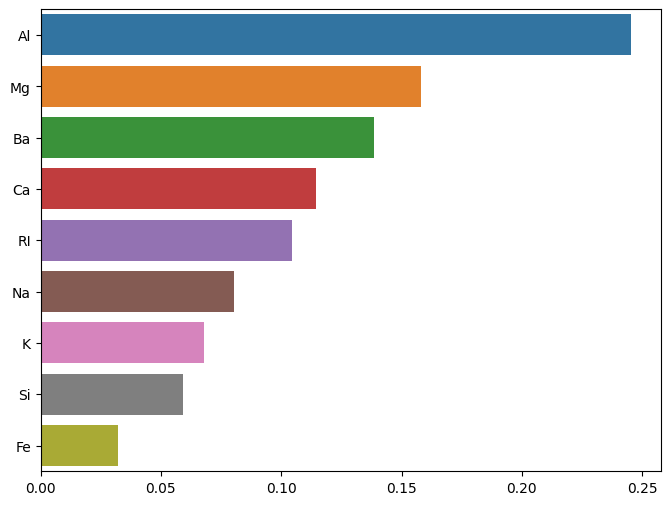

In [ ]:
## 랜덤포레스트 변수 중요도 시각와
plt.figure(figsize=(8,6))
sns.barplot(x=feature_imp,y=feature_imp.index)


1. n_estimators:

- 의사결정 트리의 개수를 지정합니다.
- 일반적으로 더 많은 트리를 사용하면 모델의 성능이 향상됩니다. 하지만 계산 비용도 증가하므로 적절한 값을 선택해야 합니다.
2. criterion:

- 노드 분할 기준을 선택합니다. 'gini'나 'entropy' 중 하나를 선택합니다.
- 기본값은 'gini'입니다.

3. max_depth:

- 각 의사결정 트리의 최대 깊이를 제한합니다.
- 깊이를 제한하여 과적합을 방지하거나 모델을 간단하게 만들 수 있습니다.
4. min_samples_split:

- 노드를 분할하기 위한 최소 샘플 수를 지정합니다.
- 이 값보다 적은 수의 샘플이 노드에 있으면 더 이상 분할하지 않습니다.

5. min_samples_leaf:

- 리프 노드(말단 노드)에 있어야 하는 최소 샘플 수를 지정합니다.
- 이 값보다 적은 수의 샘플이 있는 리프 노드는 더 이상 분할하지 않습니다.

6. max_features:

- 각 트리에서 분할할 때 고려할 최대 특성(속성)의 수를 지정합니다.
- 작은 값으로 설정하면 모델의 다양성이 증가하고 과적합을 방지할 수 있습니다.
7. bootstrap:

- 데이터를 무작위로 복원 추출(bootstrap 샘플링)하여 각 트리를 학습할지 여부를 지정합니다.
- 기본값은 True이며, True로 설정하면 무작위 샘플링을 수행합니다.
8. n_jobs:

- 병렬 처리를 위해 사용할 CPU 코어의 수를 지정합니다.
-1로 설정하면 가능한 모든 코어를 사용합니다.


#### 내생각

파라미터를 근데 내가 정하는게 의미가 있나...싶은 생각이 들었음.
데이터에 대한 인사이트가 아니라 그냥 분류나 회귀를 위한 모델링을 하기위한 파라미터를 정의하는데 이거는 사이킷 런이 알아서 해줌
목적은 분류나 회귀를 잘하는 모델을 만드는거라 파라미터 튜닝을 내가 할 필요는 없음
그래서 그리드서치, 랜덤서치, 베이지안 최적화 등등을 하는거 같음

원래 파라미터 하나마다 내가 설정할만한건줄 알았는데 그런느낌은 아닌듯 ㅋ